# Importing the required modules

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import metrics
import matplotlib.pyplot as plt

# Reading the dataset

In [92]:
df = pd.read_csv(r"C:\Users\mitug\Machine-Learning-Lab\Lab-6_Perceptron_and_Logistic_Regression\sonar (1).all-data",header=None)

# A glimpse into the dataset

In [93]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

# Seggregating the columns

In [95]:
target = 60
numerical = df.columns[0:59]

# Test Train Split

In [96]:
X_train,X_test,y_train,y_test = train_test_split(df,
    df[target],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)

In [97]:
X_train.pop(60)
X_test.pop(60)

12     R
80     R
33     R
5      R
187    M
83     R
116    M
122    M
90     R
154    M
45     R
156    M
52     R
189    M
96     R
86     R
204    M
37     R
66     R
18     R
170    M
Name: 60, dtype: object

# Training the Logistic Regression Model

In [98]:
m = LogisticRegression()
m.fit(X_train,y_train)

LogisticRegression()

In [99]:
y_pred_train = m.predict(X_train)
y_pred_test = m.predict(X_test)

In [100]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.8449197860962567

In [101]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.8571428571428571

# Training the Perceptron

In [102]:
p = Perceptron(random_state=42,max_iter=20,tol=0.001)
p.fit(X_train, y_train)

Perceptron(max_iter=20, random_state=42)

In [103]:
y_pred_train_p = p.predict(X_train)
y_pred_test_p = p.predict(X_test)

In [104]:
metrics.accuracy_score(y_pred=y_pred_train_p,y_true=y_train)

0.7486631016042781

In [105]:
metrics.accuracy_score(y_pred=y_pred_test_p,y_true=y_test)

0.7142857142857143

# Comparison on the random state

In [106]:
accuracies = {"lrtrain" : [],"lrtest" : [],"ptrain" : [],"ptest": []}
for x in range(0,15):
    # Randomising the dataset split
    X_train,X_test,y_train,y_test = train_test_split(df,
    df[target],
    test_size = 0.10,
    train_size=0.90,
    random_state = x
    )
    X_train.pop(60)
    X_test.pop(60)
    # Training the Logistic Regression Model
    m = LogisticRegression()
    m.fit(X_train,y_train)
    y_pred_train = m.predict(X_train)
    y_pred_test = m.predict(X_test)
    accuracies['lrtrain'].append(metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train))
    accuracies['lrtest'].append(metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test))
    # Training the Perceptron 
    p = Perceptron(random_state=42,max_iter=40,tol=0.001)
    p.fit(X_train, y_train)
    y_pred_train_p = p.predict(X_train)
    y_pred_test_p = p.predict(X_test) 
    accuracies['ptrain'].append(metrics.accuracy_score(y_pred=y_pred_train_p,y_true=y_train))
    accuracies['ptest'].append(metrics.accuracy_score(y_pred=y_pred_test_p,y_true=y_test))

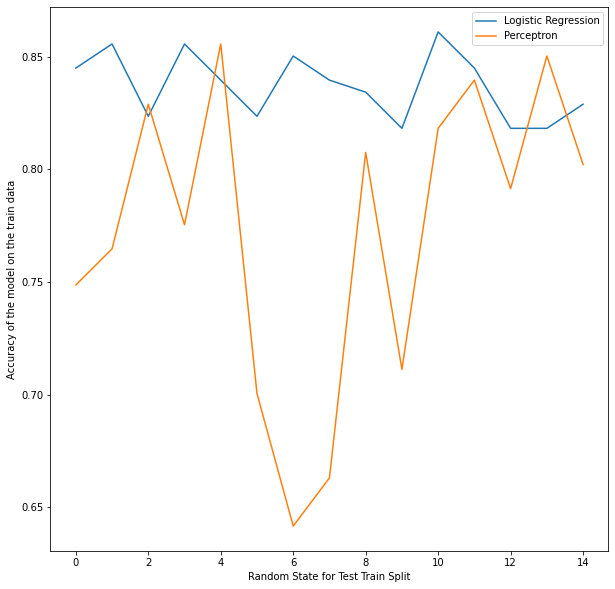

In [107]:
plt.figure(figsize=(10,10))
plt.plot(range(0,15),accuracies["lrtrain"])
plt.plot(range(0,15),accuracies["ptrain"])
plt.xlabel("Random State for Test Train Split")
plt.ylabel("Accuracy of the model on the train data")
plt.legend(['Logistic Regression','Perceptron'])
plt.show()

## Inference from plot
The Logistic Regression model has much more stable accuracy (on train data) compared to the Perceptron model with increase in the randomness of splitting the data into test and train.

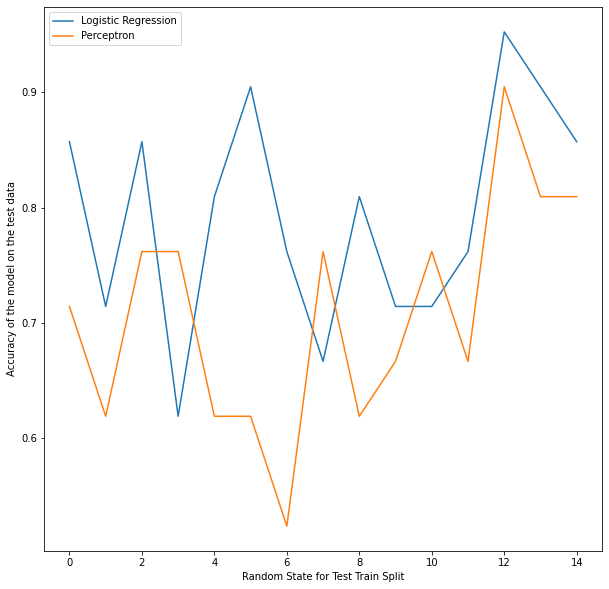

In [108]:
plt.figure(figsize=(10,10))
plt.plot(range(0,15),accuracies["lrtest"])
plt.plot(range(0,15),accuracies["ptest"])
plt.xlabel("Random State for Test Train Split")
plt.ylabel("Accuracy of the model on the test data")
plt.legend(['Logistic Regression',"Perceptron"])
plt.show()

## Inference from the plot
- The Logistic Regression model is able to generalise the train data and perform well on the test data.
- The Perceptron is relatively generalising less compared to the Logistic Regression model in most of situations with change in randomness of dataset split.

# Cross Validation

In [109]:
trainData = np.arange(0.85,0.95,0.01)

In [110]:
accuracies = {"lrtrain" : [],"lrtest" : [],"ptrain" : [],"ptest": []}
for x in trainData:
    # Randomising the dataset split
    X_train,X_test,y_train,y_test = train_test_split(df,
    df[target],
    test_size = 1-x,
    train_size= x,
    random_state = 10
    )
    X_train.pop(60)
    X_test.pop(60)
    # Training the Logistic Regression Model
    m = LogisticRegression()
    m.fit(X_train,y_train)
    y_pred_train = m.predict(X_train)
    y_pred_test = m.predict(X_test)
    accuracies['lrtrain'].append(metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train))
    accuracies['lrtest'].append(metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test))
    # Training the Perceptron 
    p = Perceptron(random_state=42,max_iter=40,tol=0.001)
    p.fit(X_train, y_train)
    y_pred_train_p = p.predict(X_train)
    y_pred_test_p = p.predict(X_test)
    accuracies['ptrain'].append(metrics.accuracy_score(y_pred=y_pred_train_p,y_true=y_train))
    accuracies['ptest'].append(metrics.accuracy_score(y_pred=y_pred_test_p,y_true=y_test))

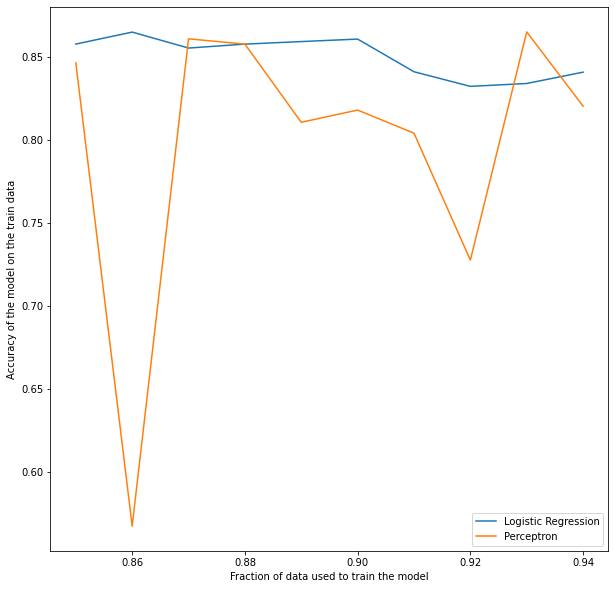

In [111]:
plt.figure(figsize=(10,10))
plt.plot(trainData,accuracies["lrtrain"])
plt.plot(trainData,accuracies["ptrain"])
plt.xlabel("Fraction of data used to train the model")
plt.ylabel("Accuracy of the model on the train data")
plt.legend(['Logistic Regression','Perceptron'])
plt.show()

## Inference from the plot:
- The Logistic Model has a relatively much more stable performance on the train dataset compared to the Perceptron with variation in the amount of data available for training and testing.

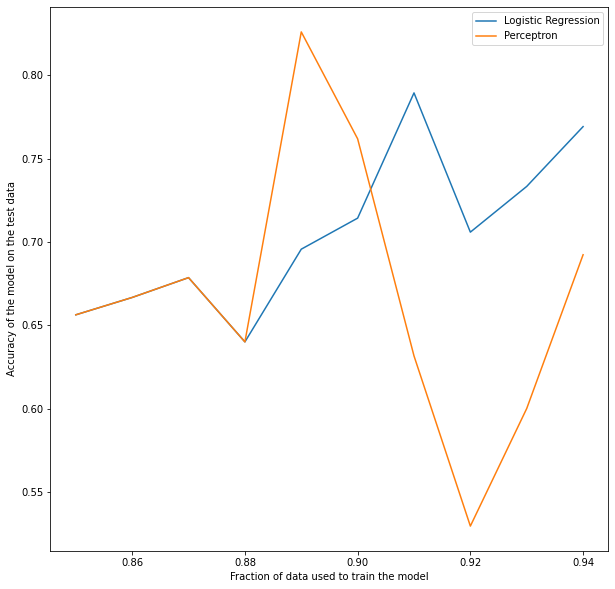

In [112]:
plt.figure(figsize=(10,10))
plt.plot(trainData,accuracies["lrtest"])
plt.plot(trainData,accuracies["ptest"])
plt.xlabel("Fraction of data used to train the model")
plt.ylabel("Accuracy of the model on the test data")
plt.legend(['Logistic Regression',"Perceptron"])
plt.show()

## Inference from the plot:
- Initially, both the model are able to generalise the train data in the same manner.
- For the perceptron, the highest accuracy is near 0.85 and lowest accuracy is near 0.50. Hence, a variation of 30% is bit higher compared to the Logistic regression model.

# Final Statement

The Logistic regression model is much more stable compared to the Perceptron model with respect to:
1. Change in randomness of dataset splitting.
2. Change in the ratio of train data:test data (i.e. cross validation)